<a href="https://colab.research.google.com/github/M-Dogra/Python/blob/main/Healthcare_Data_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Healthcare Data Insights: Analyzing Age Distribution across Disease Categories**

---





**Project Overview**

The aim of this project is to provide meaningful insights into healthcare data, focusing on the age distribution of individuals across various disease categories and uncover trends that may guide healthcare decision-making. This analysis involves creating visualizations to highlight trends and patterns in age demographics and their relationship to specific health conditions. The boxplot and violin plot presented serve as key tools for understanding these dynamics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/medical_records.csv')

In [3]:
data.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Disease_Category
0,1,10,Male,152,160.8,131,91,Healthy
1,2,111,Female,172,31.1,134,100,Nephrology
2,3,97,Female,159,24.7,147,87,Hypertension
3,4,108,Female,146,61.3,159,99,Stroke
4,5,8,Male,172,112.9,132,92,Healthy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Height_cm                 1000 non-null   int64  
 4   Weight_kg                 1000 non-null   float64
 5   Blood_Pressure_Systolic   1000 non-null   int64  
 6   Blood_Pressure_Diastolic  1000 non-null   int64  
 7   Disease_Category          1000 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [5]:
data.describe(include='all')

,Patient_ID,Age,Gender,Height_cm,Weight_kg,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Disease_Category
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,7
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Stroke
freq,NaN,NaN,508,NaN,NaN,NaN,NaN,164
mean,500.500000,59.068000,NaN,161.067000,83.054200,134.509000,87.583000,NaN
std,288.819436,33.144591,NaN,9.982392,46.915766,14.757564,10.521398,NaN
min,1.000000,1.000000,NaN,145.000000,2.000000,110.000000,70.000000,NaN
25%,250.750000,29.000000,NaN,152.000000,42.100000,122.000000,78.000000,NaN
50%,500.500000,60.500000,NaN,161.000000,83.150000,135.000000,88.000000,NaN
75%,750.250000,87.000000,NaN,170.000000,122.850000,147.000000,96.000000,NaN


# **Data Overview**
**Data Fields**

1. Patient_ID: Unique identifier for each patient.
2. Age: Patient's age (1-115 years).
3. Gender: Male or Female, with slightly more males in the dataset.
4. Height (cm): Ranges from 145 cm to 178 cm, averaging 161.07 cm.
5. Weight (kg): Ranges from 2 kg to 166.8 kg, averaging 83.05 kg.
6. Blood Pressure Systolic: Values range from 110 to 160, with an average of 134.5.
7. Blood Pressure Diastolic: Values range from 70 to 105, with an average of 87.5.
8. Disease Category: Categories include Stroke, Healthy, Hypertension, Nephrology, Heart Disease, Diabetes, and Cancer. Stroke is the most frequent category with 164 patients.

**Summary Statistics**
* Total Patients: 1,000
* Average Age: 59.06 years
* Most frequent disease: Stroke
* Gender distribution: 508 Males, 492 Females


In [6]:
stroke_data = data[data['Disease_Category']=='Stroke']
print(stroke_data.describe())

       Patient_ID         Age   Height_cm   Weight_kg  \
count  164.000000  164.000000  164.000000  164.000000   
mean   474.170732   57.097561  160.817073   84.425000   
std    289.189403   32.856487    9.818760   46.449049   
min      4.000000    2.000000  145.000000    4.900000   
25%    228.250000   26.750000  151.000000   45.050000   
50%    443.000000   57.500000  160.000000   84.250000   
75%    715.250000   86.000000  169.000000  130.200000   
max    993.000000  115.000000  178.000000  164.700000   

       Blood_Pressure_Systolic  Blood_Pressure_Diastolic  
count               164.000000                164.000000  
mean                133.853659                 87.006098  
std                  14.499521                 10.837051  
min                 110.000000                 70.000000  
25%                 121.000000                 78.000000  
50%                 135.000000                 87.500000  
75%                 144.250000                 96.250000  
max           

**Age:**

Mean Age: 57.1 years.

Range: 2 to 115 years (wide variation).

Quartile Observations:

* Q1 (25%): 26.75 years
* Median (Q2): 57.5 years
* Q3 (75%): 86 years

**Insights**: Majority of patients are middle-aged to older, but there are a few younger individuals, likely due to unique cases or pediatric conditions.

In [7]:
disease_stats = data.groupby('Disease_Category').describe(include='all')
print(disease_stats)

                 Patient_ID                                               \
                      count unique top freq        mean         std  min   
Disease_Category                                                           
Cancer                131.0    NaN NaN  NaN  496.274809  287.514790  9.0   
Diabetes              140.0    NaN NaN  NaN  517.085714  286.847401  6.0   
Healthy               135.0    NaN NaN  NaN  527.970370  299.616146  1.0   
Heart Disease         153.0    NaN NaN  NaN  517.692810  291.075960  8.0   
Hypertension          137.0    NaN NaN  NaN  474.525547  272.902808  3.0   
Nephrology            140.0    NaN NaN  NaN  498.850000  294.888954  2.0   
Stroke                164.0    NaN NaN  NaN  474.170732  289.189403  4.0   

                                         ... Blood_Pressure_Diastolic      \
                     25%    50%     75%  ...                   unique top   
Disease_Category                         ...                                
Cancer  

**Category-Specific Observations**
1. Cancer:
* Patients exhibit a notable range in age and weight, with potentially unique patient profiles (e.g., pediatric to geriatric).
* Blood pressures indicate some prevalence of elevated BP but lower compared to other categories.
2. Diabetes:
* High weights (mean 85.4 kg approx) and blood pressure readings align with metabolic risks common in diabetes.
* Age range skews toward older individuals.
3. Healthy:
* Interestingly older (mean age: 63 years), likely reflecting fewer young and middle-aged healthy patients.
* Blood pressure values indicate some variability despite the "healthy" label.
4. Heart Disease:
* Elevated weights and blood pressures across systolic and diastolic metrics suggest risks linked to cardiovascular issues.
* Age and blood pressure are consistent with expected demographic patterns.
5. Hypertension:
* Direct reflection of elevated systolic (mean: 134 mmHg approx) and diastolic (mean: 87 mmHg approx) pressures.
* Weight and age patterns resemble those of Diabetes and Heart Disease patients.
6. Nephrology:
* Highest mean diastolic BP (89.4 mmHg approx), possibly due to renal complications impacting BP regulation.
* Slightly heavier weight distribution hints at possible fluid retention or other renal implications.
7. Stroke:
* BP readings indicate known risk factors.
* Weight and height do not deviate significantly compared to other categories.

**Insights and Recommendations**
1. Cardiometabolic Risks:
Shared traits like elevated blood pressure and higher weights across most categories (Hypertension, Diabetes, Heart Disease) suggest overlapping comorbidities.
2. Cancer & Nephrology:
Cancer patients demonstrate lower weights and wide age variations, while nephrology highlights uniquely elevated diastolic pressure.
3. Healthy Group:
Surprisingly higher mean age could benefit from focused analysis of their physiological metrics versus patients in disease categories.


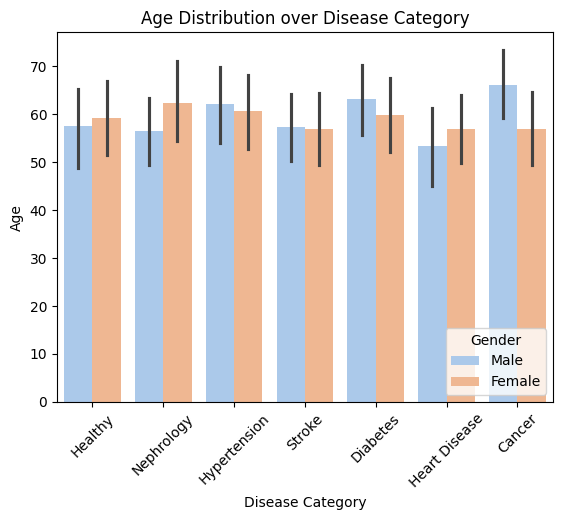

In [17]:
sns.barplot(
    data = data,
    x = 'Disease_Category',
    y = 'Age',
    hue = 'Gender',
    palette = 'pastel',
    estimator = "mean"
)
plt.xlabel('Disease Category')
plt.ylabel('Age')
plt.title('Age Distribution over Disease Category')
plt.xticks(rotation=45)
plt.legend(title='Gender',loc ='lower right')
plt.show()

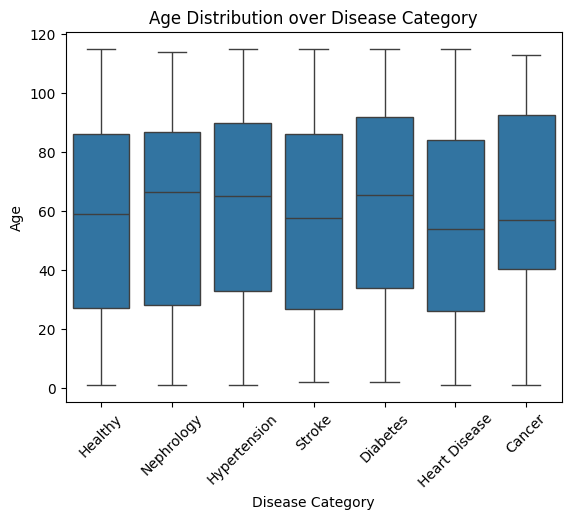

In [8]:
sns.boxplot(
    data = data,
    x = 'Disease_Category',
    y = 'Age'
    )
plt.xlabel('Disease Category')
plt.ylabel('Age')
plt.title('Age Distribution over Disease Category')
plt.xticks(rotation=45)
plt.show()

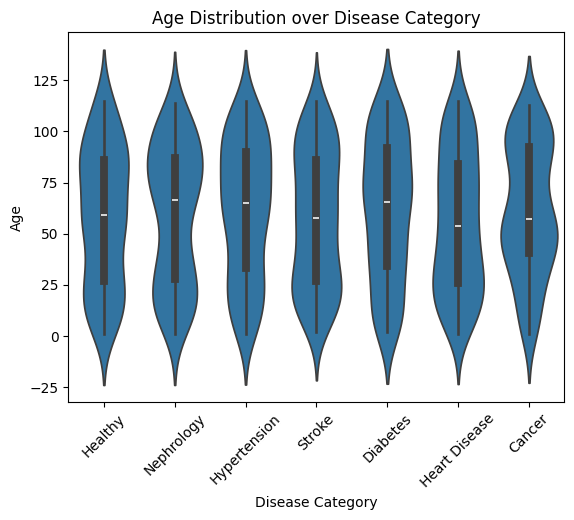

In [ ]:
sns.violinplot(
    data = data,
    x='Disease_Category',
    y='Age'
)
plt.xlabel('Disease Category')
plt.ylabel('Age')
plt.title('Age Distribution over Disease Category')
plt.xticks(rotation=45)
plt.show()

The two graphs visualize the age distribution across different disease categories. Here's an analysis of each graph and a comparison:

## **Boxplot (Graph 1)**:

**Central Tendency**: The median age for all disease categories is similar, hovering around middle age (60 years approx), except for Cancer, where the median appears lower (50 years approx).
Spread: The interquartile range (IQR) (difference between Q3 and Q1) is similar across categories, indicating comparable variability in age distributions.

**Outliers**: There don’t appear to be extreme outliers visible.

**Symmetry**: The distribution of age shows slight variations but generally indicates a consistent age spread in most categories.


## **Violin Plot (Graph 2):**
**Shape and Distribution:** This plot adds insights about the density of age distributions:

*   Categories such as Cancer show a concentrated density around younger ages, suggesting more younger individuals affected.
*   Categories such as Healthy, Hypertension, and Stroke have higher densities at middle-aged groups, reinforcing the trends seen in the boxplot.

**Tail Distribution:** Some categories, e.g., Cancer, have smaller tails indicating fewer very young or old individuals.

## **General Observations:**

1.   Healthy individuals have a wider range of ages, evenly spread across the distribution.
2.   Chronic diseases like Diabetes and Heart Disease show middle-aged dominance, correlating with known risks associated with lifestyle diseases.
3.   Cancer skews younger compared to others in this sample.
4.   The violin plot adds clarity on concentration points in data, which complements the quartiles visible in the boxplot.

## **Summary:**

*   Both graphs suggest that chronic and acute conditions generally concentrate in middle-aged groups.
*   Diseases like cancer show potential trends of affecting younger individuals in the dataset, which may warrant further investigation or confirmation in external datasets.
*   Healthy individuals reflect a broad age spectrum, which provides a reference point for other categories.



**Overall Analysis**

The dataset paints a clear picture of age, weight, and blood pressure being critical variables influencing the likelihood of specific diseases. Patterns of comorbidities, such as between Hypertension, Heart Disease, and Diabetes, indicate opportunities for targeted interventions. On the other hand, specific conditions like Cancer and Nephrology show distinct profiles requiring specialized focus.



**Recommendations**
1. Preventive Care:
Early interventions targeting hypertension, diabetes, and weight management could significantly reduce the risk of heart disease and stroke.
2. Focus Areas:
Cancer care strategies should address variability in patient demographics, suggesting personalized approaches.
Renal health screening in hypertensive patients to prevent nephrology-linked complications.
3. Healthy Patient Study:
Investigating longevity and resilience factors among healthy patients could provide insights into effective health practices.
4. Visualization and Predictive Analysis:
The existing data opens avenues for predictive modeling to identify at-risk individuals and implement early interventions.